In [1]:
import libpysal

In [2]:
import numpy as np

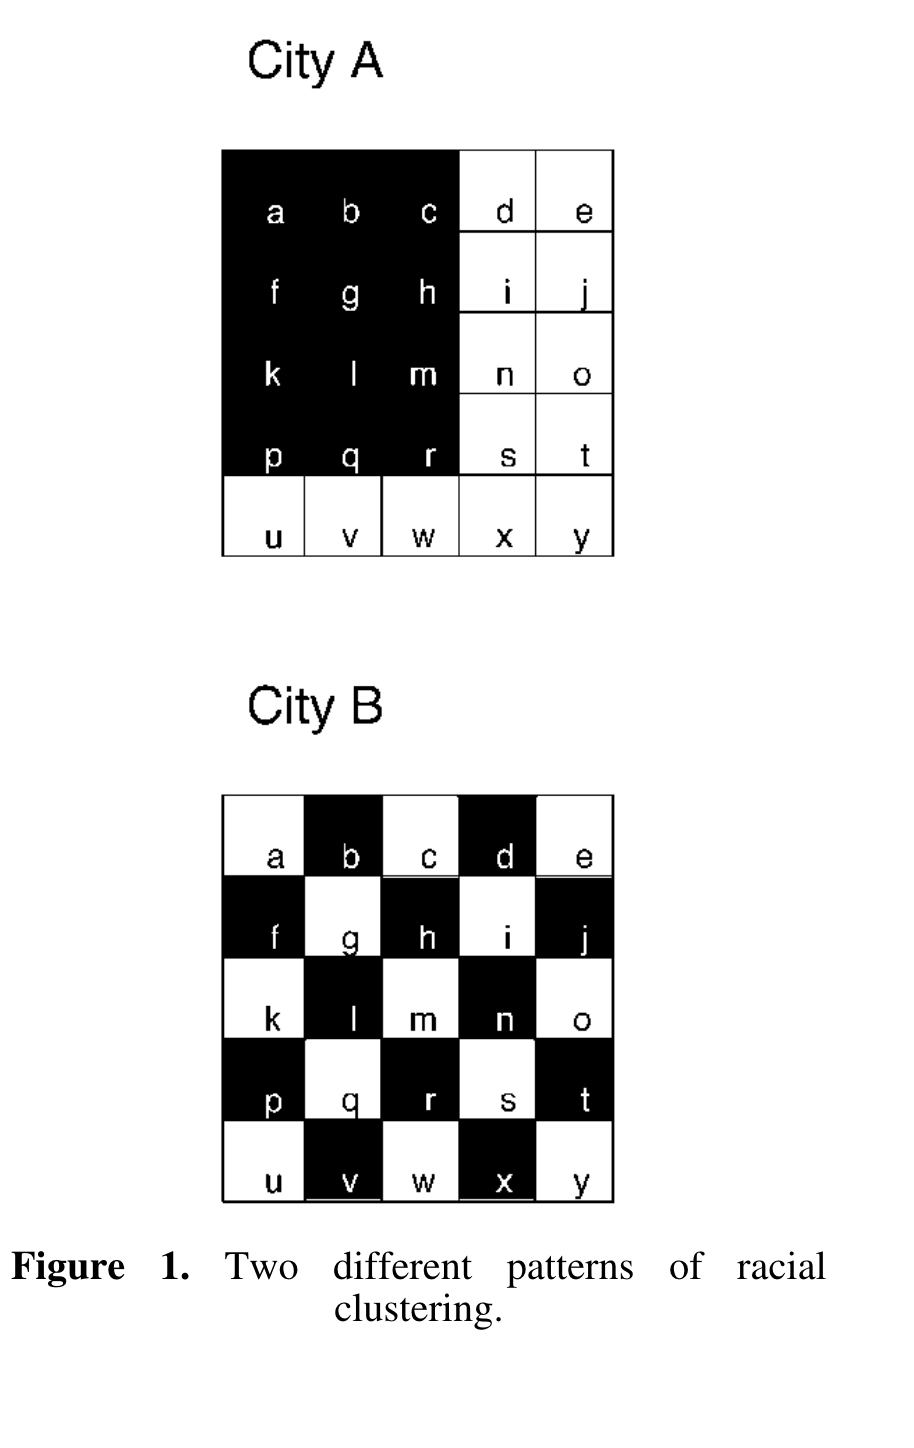

In [3]:
w = libpysal.weights.lat2W(5,5)

In [4]:
import pandas as pd
import geopandas as gpd

In [5]:
Ba = [1,1,1,0,0] *4
Ba.extend([0]*5)

In [6]:
Ba

[1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

In [7]:
Bb = [0, 1] * 12
Bb.append(0)
Bb

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [16]:
df = pd.DataFrame(data = np.array([Ba, Bb]).T, columns=['Ba', 'Bb'])
df['Wa'] = 1 - df.Ba
df['Wb'] = 1 - df.Bb

In [17]:
df

,Ba,Bb,Wa,Wb
0,1,0,0,1
1,1,1,0,0
2,1,0,0,1
3,0,1,1,0
4,0,0,1,1
5,1,1,0,0
6,1,0,0,1
7,1,1,0,0
8,0,0,1,1
9,0,1,1,0


In [18]:
d_neighbors = dict([(i,[i+5]) for i in range(20)])
for i in range(20, 25):
    d_neighbors[i] = [i-5]

In [19]:
d_neighbors

{0: [5],
 1: [6],
 2: [7],
 3: [8],
 4: [9],
 5: [10],
 6: [11],
 7: [12],
 8: [13],
 9: [14],
 10: [15],
 11: [16],
 12: [17],
 13: [18],
 14: [19],
 15: [20],
 16: [21],
 17: [22],
 18: [23],
 19: [24],
 20: [15],
 21: [16],
 22: [17],
 23: [18],
 24: [19]}

In [20]:
w = libpysal.weights.W(neighbors=d_neighbors)

/home/serge/miniforge3/envs/pysal/lib/python3.12/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)


The columns are components.

In [21]:
# city wide ratio B/W is 130/120 in both cities
df['WSa'] =  df.Wa * (1/df.Wa.sum()) 
df['BSa'] =  df.Ba * (1/df.Ba.sum()) 
df['WSb'] =  df.Wb * (1/df.Wb.sum()) 
df['BSb'] =  df.Bb * (1/df.Bb.sum()) 

In [22]:
df.head()

,Ba,Bb,Wa,Wb,WSa,BSa,WSb,BSb
0,1,0,0,1,0.000000,0.083333,0.076923,0.000000
1,1,1,0,0,0.000000,0.083333,0.000000,0.083333
2,1,0,0,1,0.000000,0.083333,0.076923,0.000000
3,0,1,1,0,0.076923,0.000000,0.000000,0.083333
4,0,0,1,1,0.076923,0.000000,0.076923,0.000000


In [23]:
df.sum()

Ba     12.0
Bb     12.0
Wa     13.0
Wb     13.0
WSa     1.0
BSa     1.0
WSb     1.0
BSb     1.0
dtype: float64

In [24]:
df['Wa'] = 1 - df.Ba
df['Wb'] = 1 - df.Bb
df['BWb'] = df.Bb / df.Wb
df['BWa'] = df.Ba / df.Wa

In [25]:
df.head()

,Ba,Bb,Wa,Wb,WSa,BSa,WSb,BSb,BWb,BWa
0,1,0,0,1,0.000000,0.083333,0.076923,0.000000,0.0,inf
1,1,1,0,0,0.000000,0.083333,0.000000,0.083333,inf,inf
2,1,0,0,1,0.000000,0.083333,0.076923,0.000000,0.0,inf
3,0,1,1,0,0.076923,0.000000,0.000000,0.083333,inf,0.0
4,0,0,1,1,0.076923,0.000000,0.076923,0.000000,0.0,0.0


In [26]:
df.sort_values(by='BWa')

,Ba,Bb,Wa,Wb,WSa,BSa,WSb,BSb,BWb,BWa
24,0,0,1,1,0.076923,0.000000,0.076923,0.000000,0.0,0.0
22,0,0,1,1,0.076923,0.000000,0.076923,0.000000,0.0,0.0
21,0,1,1,0,0.076923,0.000000,0.000000,0.083333,inf,0.0
3,0,1,1,0,0.076923,0.000000,0.000000,0.083333,inf,0.0
4,0,0,1,1,0.076923,0.000000,0.076923,0.000000,0.0,0.0
20,0,0,1,1,0.076923,0.000000,0.076923,0.000000,0.0,0.0
19,0,1,1,0,0.076923,0.000000,0.000000,0.083333,inf,0.0
18,0,0,1,1,0.076923,0.000000,0.076923,0.000000,0.0,0.0
8,0,0,1,1,0.076923,0.000000,0.076923,0.000000,0.0,0.0
9,0,1,1,0,0.076923,0.000000,0.000000,0.083333,inf,0.0


In [27]:
import string

In [28]:
idx = list(string.ascii_lowercase)

In [29]:
df.index = idx[:-1]

In [30]:
df.head()

,Ba,Bb,Wa,Wb,WSa,BSa,WSb,BSb,BWb,BWa
a,1,0,0,1,0.000000,0.083333,0.076923,0.000000,0.0,inf
b,1,1,0,0,0.000000,0.083333,0.000000,0.083333,inf,inf
c,1,0,0,1,0.000000,0.083333,0.076923,0.000000,0.0,inf
d,0,1,1,0,0.076923,0.000000,0.000000,0.083333,inf,0.0
e,0,0,1,1,0.076923,0.000000,0.076923,0.000000,0.0,0.0


In [31]:
G = np.zeros((25, 25))

In [32]:
G.shape

(25, 25)

In [33]:
lidx = np.tril_indices(25, k=-1)
uidx = np.triu_indices(25, k=1)
G[uidx] = -1
G[lidx] = 1

In [34]:
G[:, 0:2]

array([[ 0., -1.],
       [ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [35]:
df.head()

,Ba,Bb,Wa,Wb,WSa,BSa,WSb,BSb,BWb,BWa
a,1,0,0,1,0.000000,0.083333,0.076923,0.000000,0.0,inf
b,1,1,0,0,0.000000,0.083333,0.000000,0.083333,inf,inf
c,1,0,0,1,0.000000,0.083333,0.076923,0.000000,0.0,inf
d,0,1,1,0,0.076923,0.000000,0.000000,0.083333,inf,0.0
e,0,0,1,1,0.076923,0.000000,0.076923,0.000000,0.0,0.0


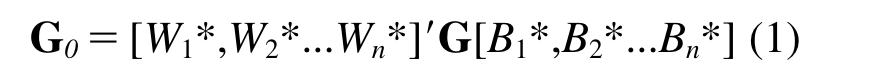

In [36]:
df.head()

,Ba,Bb,Wa,Wb,WSa,BSa,WSb,BSb,BWb,BWa
a,1,0,0,1,0.000000,0.083333,0.076923,0.000000,0.0,inf
b,1,1,0,0,0.000000,0.083333,0.000000,0.083333,inf,inf
c,1,0,0,1,0.000000,0.083333,0.076923,0.000000,0.0,inf
d,0,1,1,0,0.076923,0.000000,0.000000,0.083333,inf,0.0
e,0,0,1,1,0.076923,0.000000,0.076923,0.000000,0.0,0.0


In [37]:
dfA = df.sort_values(by='BWa', ascending=False)

In [38]:
np.dot(dfA.WSa.T, np.dot(G, dfA.BSa))

0.9999999999999998

In [39]:
dfB = df.sort_values(by='BWb', ascending=False)

np.dot(dfB.WSb.T, np.dot(G, dfB.BSb))

0.9999999999999998

Replicates a-spatial Gini thus far

## Dawkins W

In [40]:
w_dawk = dict([(i,[i+5]) for i in range(20)])
for i in range(20, 25):
    w_dawk[i] = [i-5]
    


In [41]:
w_dawk

{0: [5],
 1: [6],
 2: [7],
 3: [8],
 4: [9],
 5: [10],
 6: [11],
 7: [12],
 8: [13],
 9: [14],
 10: [15],
 11: [16],
 12: [17],
 13: [18],
 14: [19],
 15: [20],
 16: [21],
 17: [22],
 18: [23],
 19: [24],
 20: [15],
 21: [16],
 22: [17],
 23: [18],
 24: [19]}

In [42]:
w_dawk = libpysal.weights.W(w_dawk)

/home/serge/miniforge3/envs/pysal/lib/python3.12/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)


columns are the components

In [43]:
libpysal.weights.lag_spatial(w_dawk, df.BWa)

array([inf, inf, inf,  0.,  0., inf, inf, inf,  0.,  0., inf, inf, inf,
        0.,  0.,  0.,  0.,  0.,  0.,  0., inf, inf, inf,  0.,  0.])

In [44]:
libpysal.weights.lag_spatial(w_dawk, df.BWb)

array([inf,  0., inf,  0., inf,  0., inf,  0., inf,  0., inf,  0., inf,
        0., inf,  0., inf,  0., inf,  0., inf,  0., inf,  0., inf])

In [45]:
df['LBWa'] = libpysal.weights.lag_spatial(w_dawk, df.BWa)

In [46]:
df['LBWb'] = libpysal.weights.lag_spatial(w_dawk, df.BWb)

In [47]:
dfA = df.sort_values(by='LBWa', ascending=False)

np.dot(dfA.WSa.T, np.dot(G, dfA.BSa))

0.3717948717948718

Dawkins reports 0.5 for city A? I think that is an error in the original article.

In [49]:
dfB = df.sort_values(by='LBWb', ascending=False)

np.dot(dfB.WSb.T, np.dot(G, dfB.BSb))

-1.0

Matches for City B

## Calculating the lag

Is the lag of the BW ratios the same as the ratio of the lag(B)/lag(W)?

## Functions for Dawkins statistics

In [55]:
dfA = df[['WSa', 'BSa']]

In [59]:
dfA['b'] = dfA.BSa * 130
dfA['w'] = dfA.WSa * 120
dfA['t'] = dfA.b + dfA.w

/tmp/ipykernel_296318/3343767645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfA['b'] = dfA.BSa * 130
/tmp/ipykernel_296318/3343767645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfA['w'] = dfA.WSa * 120
/tmp/ipykernel_296318/3343767645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [60]:
dfA.head()

,WSa,BSa,b,w,t
a,0.000000,0.083333,10.833333,0.000000,10.833333
b,0.000000,0.083333,10.833333,0.000000,10.833333
c,0.000000,0.083333,10.833333,0.000000,10.833333
d,0.076923,0.000000,0.000000,9.230769,9.230769
e,0.076923,0.000000,0.000000,9.230769,9.230769


In [61]:
dfA.sum()

WSa      1.0
BSa      1.0
b      130.0
w      120.0
t      250.0
dtype: float64

In [78]:
def G0(df, w, b, t, W=None, inplace=False):
    
    segratio = df[b] / df[w]
    n = df.shape[0]
    G = np.zeros((n, n))
    lidx = np.tril_indices(25, k=-1)
    uidx = np.triu_indices(25, k=1)
    G[uidx] = -1
    G[lidx] = 1
    
    if not inplace:
        df = df.copy()
        
    df['segratio' ] = segratio
    df['Sb'] = df[b]/df[b].sum() # City share of B in unit
    df['Sw'] = df[w]/df[w].sum() # City share of W in unit
    dfS = df.sort_values(by='segratio', ascending=False)

    _G0 = np.dot(dfS.Sw.T, np.dot(G, dfS.Sb))

    if W:
        df['Wsegratio'] = libpysal.weights.lag_spatial(W, df.segratio) 
        dfS = df.sort_values(by='Wsegratio', ascending=False)
        _GS = np.dot(dfS.Sw.T, np.dot(G, dfS.Sb))
        return df, _G0, _GS

    
    return df, _G0
    

In [76]:
r = G0(dfA, 'w', 'b', 't', W=w_dawk)

In [77]:
r

(        WSa       BSa          b         w          t  segratio        Sb  \
 a  0.000000  0.083333  10.833333  0.000000  10.833333       inf  0.083333   
 b  0.000000  0.083333  10.833333  0.000000  10.833333       inf  0.083333   
 c  0.000000  0.083333  10.833333  0.000000  10.833333       inf  0.083333   
 d  0.076923  0.000000   0.000000  9.230769   9.230769       0.0  0.000000   
 e  0.076923  0.000000   0.000000  9.230769   9.230769       0.0  0.000000   
 f  0.000000  0.083333  10.833333  0.000000  10.833333       inf  0.083333   
 g  0.000000  0.083333  10.833333  0.000000  10.833333       inf  0.083333   
 h  0.000000  0.083333  10.833333  0.000000  10.833333       inf  0.083333   
 i  0.076923  0.000000   0.000000  9.230769   9.230769       0.0  0.000000   
 j  0.076923  0.000000   0.000000  9.230769   9.230769       0.0  0.000000   
 k  0.000000  0.083333  10.833333  0.000000  10.833333       inf  0.083333   
 l  0.000000  0.083333  10.833333  0.000000  10.833333       inf

In [70]:
dfA

,WSa,BSa,b,w,t
a,0.000000,0.083333,10.833333,0.000000,10.833333
b,0.000000,0.083333,10.833333,0.000000,10.833333
c,0.000000,0.083333,10.833333,0.000000,10.833333
d,0.076923,0.000000,0.000000,9.230769,9.230769
e,0.076923,0.000000,0.000000,9.230769,9.230769
f,0.000000,0.083333,10.833333,0.000000,10.833333
g,0.000000,0.083333,10.833333,0.000000,10.833333
h,0.000000,0.083333,10.833333,0.000000,10.833333
i,0.076923,0.000000,0.000000,9.230769,9.230769
j,0.076923,0.000000,0.000000,9.230769,9.230769


In [80]:
dfB = df[['WSb', 'BSb']]
dfB['b'] = dfB.BSb * 130
dfB['w'] = dfB.WSb * 120
dfB['t'] = dfB.b + dfB.w

/tmp/ipykernel_296318/2651361100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfB['b'] = dfB.BSb * 130
/tmp/ipykernel_296318/2651361100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfB['w'] = dfB.WSb * 120
/tmp/ipykernel_296318/2651361100.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [81]:
r = G0(dfB, 'w', 'b', 't', W=w_dawk)
r

(        WSb       BSb          b         w          t  segratio        Sb  \
 a  0.076923  0.000000   0.000000  9.230769   9.230769       0.0  0.000000   
 b  0.000000  0.083333  10.833333  0.000000  10.833333       inf  0.083333   
 c  0.076923  0.000000   0.000000  9.230769   9.230769       0.0  0.000000   
 d  0.000000  0.083333  10.833333  0.000000  10.833333       inf  0.083333   
 e  0.076923  0.000000   0.000000  9.230769   9.230769       0.0  0.000000   
 f  0.000000  0.083333  10.833333  0.000000  10.833333       inf  0.083333   
 g  0.076923  0.000000   0.000000  9.230769   9.230769       0.0  0.000000   
 h  0.000000  0.083333  10.833333  0.000000  10.833333       inf  0.083333   
 i  0.076923  0.000000   0.000000  9.230769   9.230769       0.0  0.000000   
 j  0.000000  0.083333  10.833333  0.000000  10.833333       inf  0.083333   
 k  0.076923  0.000000   0.000000  9.230769   9.230769       0.0  0.000000   
 l  0.000000  0.083333  10.833333  0.000000  10.833333       inf

In [83]:
r[-1] / r[-2]

-1.0000000000000002

## TODO
- [ ] lag of seg ratio or derived ratio on lags of b and w?
- [ ] reconsider inplace for updating gdf
- [ ] optimize G for memory
- [ ] inference
- [ ] document
- [ ] test

### lag calculation

In [84]:
Wlat = libpysal.weights.lat2W(5,5)

In [86]:
Wlat.n

25

Ratio of lags (binary W)

In [95]:
Wb = libpysal.weights.lag_spatial(Wlat, dfB.b)
Ww = libpysal.weights.lag_spatial(Wlat, dfB.w)

rat = Wb/Ww

rat

/tmp/ipykernel_296318/3037210544.py:4: RuntimeWarning: divide by zero encountered in divide
  rat = Wb/Ww


array([inf,  0., inf,  0., inf,  0., inf,  0., inf,  0., inf,  0., inf,
        0., inf,  0., inf,  0., inf,  0., inf,  0., inf,  0., inf])

In [93]:
dfB['Wb'] = Wb
dfB['Ww'] = Ww
dfB['WBrWw'] = rat
dfB['segratio'] = (dfB.b / dfB.b.sum()) / (dfB.w / dfB.w.sum())
dfB['Wsegratio'] = libpysal.weights.lag_spatial(Wlat, dfB.segratio)
dfB.head()

/tmp/ipykernel_296318/2358995312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfB['Wb'] = Wb
/tmp/ipykernel_296318/2358995312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfB['Ww'] = Ww
/tmp/ipykernel_296318/2358995312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

,WSb,BSb,b,w,t,Wb,Ww,WBrWw,segratio,Wsegratio
a,0.076923,0.000000,0.000000,9.230769,9.230769,21.666667,0.000000,inf,0.0,inf
b,0.000000,0.083333,10.833333,0.000000,10.833333,0.000000,27.692308,0.0,inf,0.0
c,0.076923,0.000000,0.000000,9.230769,9.230769,32.500000,0.000000,inf,0.0,inf
d,0.000000,0.083333,10.833333,0.000000,10.833333,0.000000,27.692308,0.0,inf,0.0
e,0.076923,0.000000,0.000000,9.230769,9.230769,21.666667,0.000000,inf,0.0,inf


In [94]:
dfB.WBrWw - dfB.Wsegratio

a    NaN
b    0.0
c    NaN
d    0.0
e    NaN
f    0.0
g    NaN
h    0.0
i    NaN
j    0.0
k    NaN
l    0.0
m    NaN
n    0.0
o    NaN
p    0.0
q    NaN
r    0.0
s    NaN
t    0.0
u    NaN
v    0.0
w    NaN
x    0.0
y    NaN
dtype: float64

Identical since B is the checkerboard pattern

In [96]:
Wb = libpysal.weights.lag_spatial(Wlat, dfA.b)
Ww = libpysal.weights.lag_spatial(Wlat, dfA.w)

rat = Wb/Ww

rat

/tmp/ipykernel_296318/1588638578.py:4: RuntimeWarning: divide by zero encountered in divide
  rat = Wb/Ww


array([       inf,        inf, 2.34722222, 0.58680556, 0.        ,
              inf,        inf, 3.52083333, 0.3912037 , 0.        ,
              inf,        inf, 3.52083333, 0.3912037 , 0.        ,
       2.34722222, 3.52083333, 1.17361111, 0.3912037 , 0.        ,
       1.17361111, 0.58680556, 0.58680556, 0.        , 0.        ])

In [97]:
dfA['Wb'] = Wb
dfA['Ww'] = Ww
dfA['WBrWw'] = rat
dfA['segratio'] = (dfA.b / dfA.b.sum()) / (dfA.w / dfA.w.sum())
dfA['Wsegratio'] = libpysal.weights.lag_spatial(Wlat, dfA.segratio)
dfA.head()

/tmp/ipykernel_296318/3100919807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfA['Wb'] = Wb
/tmp/ipykernel_296318/3100919807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfA['Ww'] = Ww
/tmp/ipykernel_296318/3100919807.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

,WSa,BSa,b,w,t,Wb,Ww,WBrWw,segratio,Wsegratio
a,0.000000,0.083333,10.833333,0.000000,10.833333,21.666667,0.000000,inf,inf,inf
b,0.000000,0.083333,10.833333,0.000000,10.833333,32.500000,0.000000,inf,inf,inf
c,0.000000,0.083333,10.833333,0.000000,10.833333,21.666667,9.230769,2.347222,inf,inf
d,0.076923,0.000000,0.000000,9.230769,9.230769,10.833333,18.461538,0.586806,0.0,inf
e,0.076923,0.000000,0.000000,9.230769,9.230769,0.000000,18.461538,0.000000,0.0,0.0


In [98]:
dfA.WBrWw - dfA.Wsegratio

a    NaN
b    NaN
c   -inf
d   -inf
e    0.0
f    NaN
g    NaN
h   -inf
i   -inf
j    0.0
k    NaN
l    NaN
m   -inf
n   -inf
o    0.0
p   -inf
q   -inf
r   -inf
s   -inf
t    0.0
u   -inf
v   -inf
w   -inf
x    0.0
y    0.0
dtype: float64

In [100]:
dfA.WBrWw == dfA.Wsegratio

a     True
b     True
c    False
d    False
e     True
f     True
g     True
h    False
i    False
j     True
k     True
l     True
m    False
n    False
o     True
p    False
q    False
r    False
s    False
t     True
u    False
v    False
w    False
x     True
y     True
dtype: bool

In [101]:
dfB.WBrWw == dfB.Wsegratio

a    True
b    True
c    True
d    True
e    True
f    True
g    True
h    True
i    True
j    True
k    True
l    True
m    True
n    True
o    True
p    True
q    True
r    True
s    True
t    True
u    True
v    True
w    True
x    True
y    True
dtype: bool

When a rook is used for the lattice checkerboard case, the lag of the ratio is equal to the ratio of the lags. This is not true for the non-checkerboard case.

lag policy option


In [106]:
def G0(df, w, b, t, W=None, inplace=False):
    
    segratio = df[b] / df[w]
    n = df.shape[0]
    G = np.zeros((n, n))
    lidx = np.tril_indices(25, k=-1)
    uidx = np.triu_indices(25, k=1)
    G[uidx] = -1
    G[lidx] = 1
    
    if not inplace:
        df = df.copy()
        
    df['segratio' ] = segratio
    df['Sb'] = df[b]/df[b].sum() # City share of B in unit
    df['Sw'] = df[w]/df[w].sum() # City share of W in unit
    dfS = df.sort_values(by='segratio', ascending=False)

    _G0 = np.dot(dfS.Sw.T, np.dot(G, dfS.Sb))

    if W:
        W.transform='r'
        df['Wsegratio'] = libpysal.weights.lag_spatial(W, df.segratio) 
        dfS = df.sort_values(by='Wsegratio', ascending=False)
        _GS = np.dot(dfS.Sw.T, np.dot(G, dfS.Sb))
        # derived lag
        W.transform='b'
        Wb = libpysal.weights.lag_spatial(W, df[b])
        Ww = libpysal.weights.lag_spatial(W, df[w])
        df['WboverWw'] = Wb / Ww
        dfS = df.sort_values(by='WboverWw', ascending=False)
        _GS1 = np.dot(dfS.Sw.T, np.dot(G, dfS.Sb))
        
        return df, _G0, _GS, _GS1

    
    return df, _G0
    

In [107]:
G0(dfA, 'w', 'b', 't', W=Wlat)

/tmp/ipykernel_296318/3462647794.py:30: RuntimeWarning: divide by zero encountered in divide
  df['WboverWw'] = Wb / Ww


(        WSa       BSa          b         w          t         Wb         Ww  \
 a  0.000000  0.083333  10.833333  0.000000  10.833333  21.666667   0.000000   
 b  0.000000  0.083333  10.833333  0.000000  10.833333  32.500000   0.000000   
 c  0.000000  0.083333  10.833333  0.000000  10.833333  21.666667   9.230769   
 d  0.076923  0.000000   0.000000  9.230769   9.230769  10.833333  18.461538   
 e  0.076923  0.000000   0.000000  9.230769   9.230769   0.000000  18.461538   
 f  0.000000  0.083333  10.833333  0.000000  10.833333  32.500000   0.000000   
 g  0.000000  0.083333  10.833333  0.000000  10.833333  43.333333   0.000000   
 h  0.000000  0.083333  10.833333  0.000000  10.833333  32.500000   9.230769   
 i  0.076923  0.000000   0.000000  9.230769   9.230769  10.833333  27.692308   
 j  0.076923  0.000000   0.000000  9.230769   9.230769   0.000000  27.692308   
 k  0.000000  0.083333  10.833333  0.000000  10.833333  32.500000   0.000000   
 l  0.000000  0.083333  10.833333  0.000

For City A, using the rook weights will result in a different spatial gini depending on whether the lag is determined as the lag of the seg ratio, or the ratio of the lags.

In [108]:
G0(dfA, 'w', 'b', 't', W=w_dawk)

/tmp/ipykernel_296318/3462647794.py:30: RuntimeWarning: divide by zero encountered in divide
  df['WboverWw'] = Wb / Ww


(        WSa       BSa          b         w          t         Wb         Ww  \
 a  0.000000  0.083333  10.833333  0.000000  10.833333  21.666667   0.000000   
 b  0.000000  0.083333  10.833333  0.000000  10.833333  32.500000   0.000000   
 c  0.000000  0.083333  10.833333  0.000000  10.833333  21.666667   9.230769   
 d  0.076923  0.000000   0.000000  9.230769   9.230769  10.833333  18.461538   
 e  0.076923  0.000000   0.000000  9.230769   9.230769   0.000000  18.461538   
 f  0.000000  0.083333  10.833333  0.000000  10.833333  32.500000   0.000000   
 g  0.000000  0.083333  10.833333  0.000000  10.833333  43.333333   0.000000   
 h  0.000000  0.083333  10.833333  0.000000  10.833333  32.500000   9.230769   
 i  0.076923  0.000000   0.000000  9.230769   9.230769  10.833333  27.692308   
 j  0.076923  0.000000   0.000000  9.230769   9.230769   0.000000  27.692308   
 k  0.000000  0.083333  10.833333  0.000000  10.833333  32.500000   0.000000   
 l  0.000000  0.083333  10.833333  0.000

In [109]:
w_dawk.transform

'B'

In [111]:
w_dawk[0]

{5: 1.0}

In [112]:
Wlat[0]

{5: 1.0, 1: 1.0}

In the original article, Dawkins uses only one neighbor so the weights standardization shouldn't matter. It will matter for the more general case.

In [113]:
G0(dfB, 'w', 'b', 't', W=Wlat)

/tmp/ipykernel_296318/3462647794.py:30: RuntimeWarning: divide by zero encountered in divide
  df['WboverWw'] = Wb / Ww


(        WSb       BSb          b         w          t         Wb         Ww  \
 a  0.076923  0.000000   0.000000  9.230769   9.230769  21.666667   0.000000   
 b  0.000000  0.083333  10.833333  0.000000  10.833333   0.000000  27.692308   
 c  0.076923  0.000000   0.000000  9.230769   9.230769  32.500000   0.000000   
 d  0.000000  0.083333  10.833333  0.000000  10.833333   0.000000  27.692308   
 e  0.076923  0.000000   0.000000  9.230769   9.230769  21.666667   0.000000   
 f  0.000000  0.083333  10.833333  0.000000  10.833333   0.000000  27.692308   
 g  0.076923  0.000000   0.000000  9.230769   9.230769  43.333333   0.000000   
 h  0.000000  0.083333  10.833333  0.000000  10.833333   0.000000  36.923077   
 i  0.076923  0.000000   0.000000  9.230769   9.230769  43.333333   0.000000   
 j  0.000000  0.083333  10.833333  0.000000  10.833333   0.000000  27.692308   
 k  0.076923  0.000000   0.000000  9.230769   9.230769  32.500000   0.000000   
 l  0.000000  0.083333  10.833333  0.000

In [115]:
G0(dfB, 'w', 'b', 't', W=w_dawk)

/tmp/ipykernel_296318/3462647794.py:30: RuntimeWarning: divide by zero encountered in divide
  df['WboverWw'] = Wb / Ww


(        WSb       BSb          b         w          t         Wb         Ww  \
 a  0.076923  0.000000   0.000000  9.230769   9.230769  21.666667   0.000000   
 b  0.000000  0.083333  10.833333  0.000000  10.833333   0.000000  27.692308   
 c  0.076923  0.000000   0.000000  9.230769   9.230769  32.500000   0.000000   
 d  0.000000  0.083333  10.833333  0.000000  10.833333   0.000000  27.692308   
 e  0.076923  0.000000   0.000000  9.230769   9.230769  21.666667   0.000000   
 f  0.000000  0.083333  10.833333  0.000000  10.833333   0.000000  27.692308   
 g  0.076923  0.000000   0.000000  9.230769   9.230769  43.333333   0.000000   
 h  0.000000  0.083333  10.833333  0.000000  10.833333   0.000000  36.923077   
 i  0.076923  0.000000   0.000000  9.230769   9.230769  43.333333   0.000000   
 j  0.000000  0.083333  10.833333  0.000000  10.833333   0.000000  27.692308   
 k  0.076923  0.000000   0.000000  9.230769   9.230769  32.500000   0.000000   
 l  0.000000  0.083333  10.833333  0.000

### inplace or not

### optimize G

### inference

### document

### test